# Module 3 Code

## Importing the data

This is largely reused from Week 2 assignment.

Have added in importing the movie information data, including adding column names for easier plotting.

In [4]:
from collections import defaultdict
from datetime import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics

USERS_DATA_FILE = os.path.join("..", "data", "u.data")
ITEMS_DATA_FILE = os.path.join("..", "data", "u.item")

N_USERS, N_MOVIES = 943, 1682

users = pd.read_csv(USERS_DATA_FILE,
                    header = None,
                    sep = "\t",
                    names = ["user", "movie", "rating", "timestamp"],
                    dtype = {"user": int,
                             "movie": int,
                             "rating": int,
                             "timestamp": int})

users.timestamp = pd.to_datetime(users.timestamp, unit = "s")

genres = ["Unknown_genre", "Action", "Adventure", "Animation", "Children", "Comedy", "Crime",
          "Documentary", "Drama", "Fantasy", "Film_Noir", "Horror", "Musical",
          "Mystery", "Romance", "Sci_Fi", "Thriller", "War", "Western"]
column_names = ["movie_id", "movie_title", "video_release", "empty", "URL"] + genres

items = pd.read_csv(ITEMS_DATA_FILE,
            sep = "|",
            #index_col = False,
            encoding = "latin-1",
            header = None,
            names = column_names)

items = items.drop(columns=["empty"])

items[['movie_title', 'year']] = items['movie_title'].str.extract(r'^(.*)\s\((\d{4})\)$')
items.year = items.year.astype(float)

# Create 2 data structures for the data (dictionary-based and array-based)
data = defaultdict(dict)
data_filled = np.full((N_USERS, N_MOVIES),
                      np.nan)

with open(USERS_DATA_FILE, newline='', encoding='utf-8') as file:
    for line in file:
        fields = line.strip().split("\t")
        user_data = data[int(fields[0])]
        user_data[int(fields[1])] = int(fields[2])

        data_filled[int(fields[0]) - 1, int(fields[1]) - 1] = int(fields[2])

data_filled_zeros = np.nan_to_num(data_filled)
data_filled_zeros_normed = data_filled_zeros - data_filled_zeros.mean(axis = 1)[:, None]

# Create row averages for movies rated
user_means = dict()
data_normed = defaultdict(dict)
for user in data.keys():
    user_ratings = data[user].values()
    if len(user_ratings) > 0:
        user_means[user] = sum(user_ratings) / len(user_ratings)
    else:
        user_means[user] = 0
    for movie in data[user].keys():
        data_normed[user][movie] = data[user][movie] - user_means[user]

## Exploring the data

### Number of movies by genre in the dataset
Based on the labels provide, drama and comedy are the two most common types of movies in the movie dataset. Fantasy, Film Noir and Western are the least represented.


Text(0.5, 1.0, 'Number of Movies by Genre')

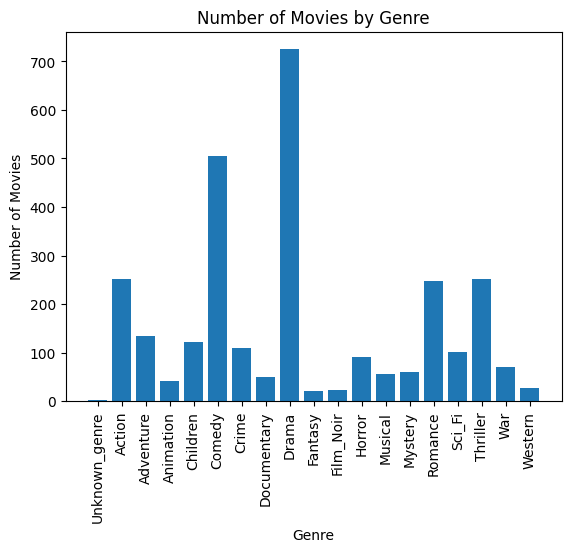

In [5]:
genres = items.iloc[:,24-20:23].sum(axis=0)

plt.bar(genres.index, genres.values)
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')

#